<a href="https://colab.research.google.com/github/code-freeze/keras_machineLearning/blob/master/housePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [0]:
zipfile.ZipFile('house-prices-advanced-regression-techniques.zip').extractall()

In [0]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [0]:
# x=train['SalePrice']
# y=train['GarageCars']
# plt.figure(figsize=(40,10))
# sns.regplot(x=x,y=y,marker='+')
# plt.legend()

In [0]:
train_test_dataset=[train,test]

**mapping** algorithm

In [0]:
# centralAir_mapping={"Y":1,"N":0}
# for dataset in train_test_dataset:
#   dataset['CentralAir']=dataset['CentralAir'].map(centralAir_mapping)

In [0]:
# street_mapping={"Pave":1,"Grvl":0}
# for dataset in train_test_dataset:
#   dataset['Street']=dataset['Street'].map(street_mapping)

In [0]:
# landContour_mapping={'Lvl':1, 'Bnk':2, 'Low':3, 'HLS':4}
# for dataset in train_test_dataset:
#   dataset['LandContour']=dataset['LandContour'].map(landContour_mapping)

In [0]:
# lotShape_mapping={'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}
# for dataset in train_test_dataset:
#   dataset['LotShape']=dataset['LotShape'].map(lotShape_mapping)

In [0]:
# LotConfig_mapping={'Inside' :1, 'FR2' :2, 'Corner' :3, 'CulDSac': 4, 'FR3':5}
# for dataset in train_test_dataset:
#   dataset['LotConfig']=dataset['LotConfig'].map(LotConfig_mapping)

In [0]:
# MSZoning_mapping={'RL':1, 'RM':2, 'C (all)' :3, 'FV':4, 'RH':5}
# for dataset in train_test_dataset:
#   dataset['MSZoning']=dataset['MSZoning'].map(MSZoning_mapping)

In [1802]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

1.8828757597682129

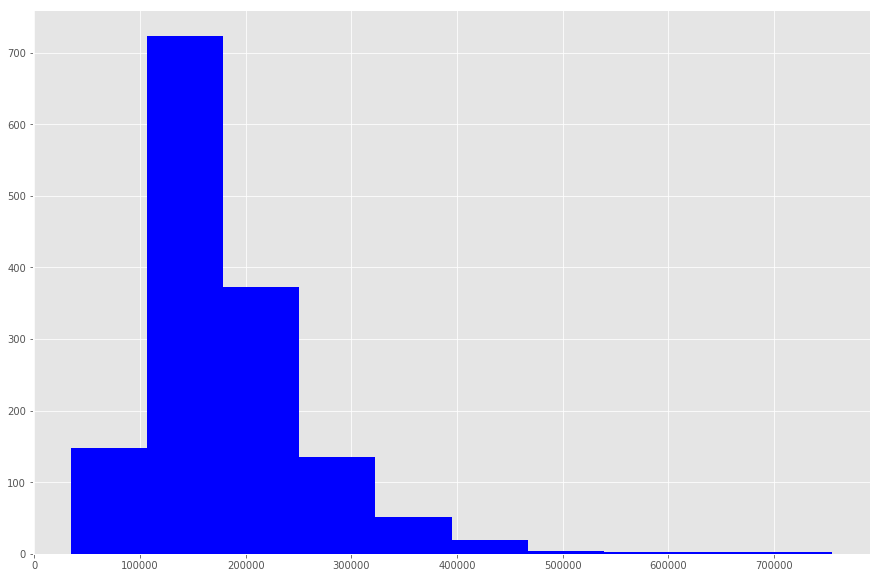

In [1803]:
plt.figure(figsize=(15,10))
plt.hist(train.SalePrice,color='blue')
train.SalePrice.skew()

0.12133506220520406

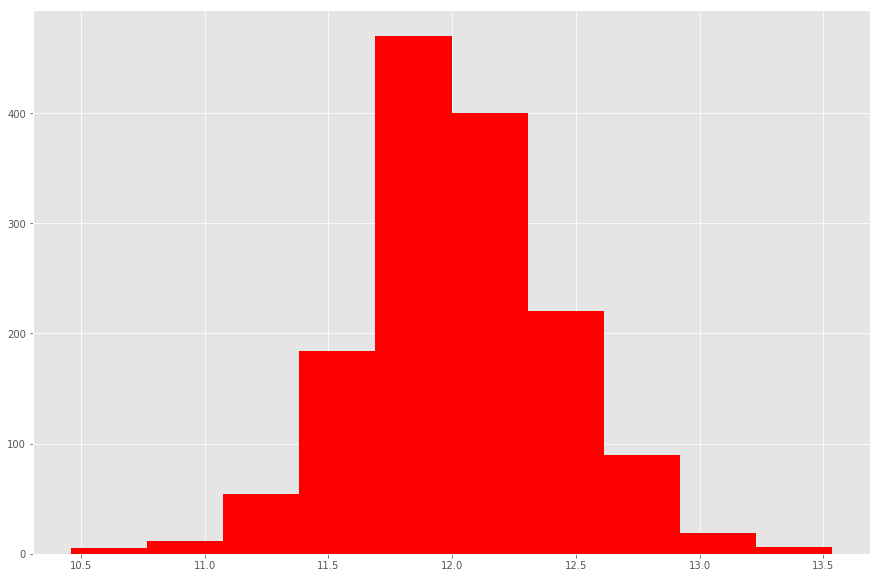

In [1804]:
transform_data=np.log(train.SalePrice)
plt.figure(figsize=(15,10))
plt.hist(transform_data,color='red')
np.log(train.SalePrice).skew()

In [1805]:
num_features=train.select_dtypes(include=(np.number))
num_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [1806]:
corr=num_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5])
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [1807]:
num_features.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

OverallQual is a scale of [1-10], 1 being the worst and 10 being the best

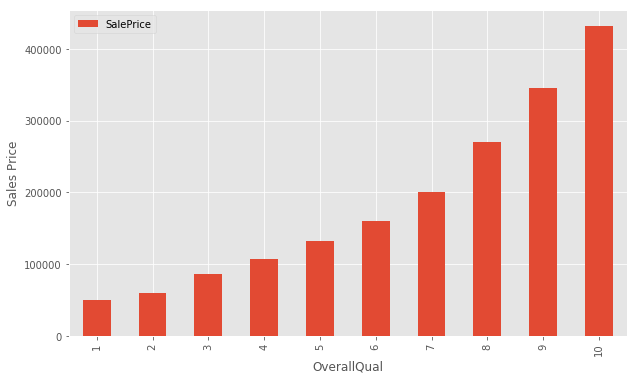

In [1808]:
quality_pivot=pd.pivot_table(num_features,values='SalePrice',index='OverallQual',aggfunc=np.median)
quality_pivot.plot(kind='bar')
plt.ylabel('Sales Price')
plt.show()

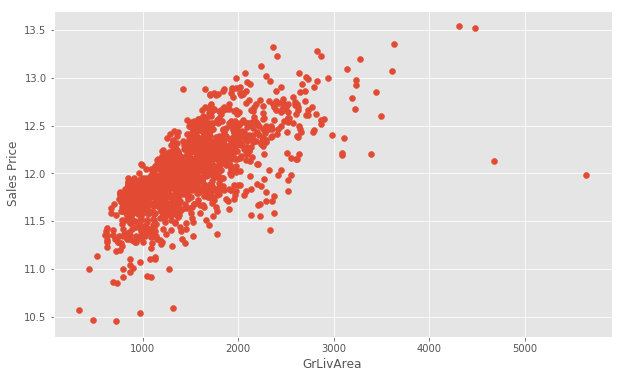

In [1809]:
plt.scatter(num_features['GrLivArea'],transform_data)
plt.xlabel('GrLivArea')
plt.ylabel('Sales Price')
plt.show()

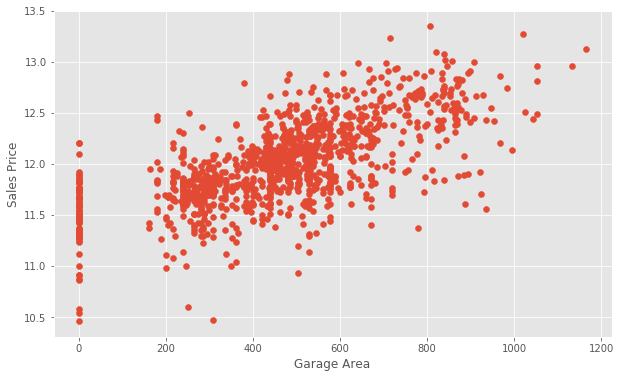

In [1810]:
train=train[train['GarageArea']<1200]
train=train[train['LotFrontage']<200]
train=train[train['LotArea']<50000]
train=train[train['MasVnrArea']<1400]
train=train[train['BsmtFinSF1']<2000]
train=train[train['TotalBsmtSF']<2500]
train=train[train['1stFlrSF']<2500]
train=train[train['GrLivArea']<4000]

test=test[test['GarageArea']<1200]
test=test[test['LotFrontage']<200]
test=test[test['LotArea']<50000]
test=test[test['MasVnrArea']<1400]
test=test[test['BsmtFinSF1']<2000]
test=test[test['TotalBsmtSF']<2500]
test=test[test['1stFlrSF']<2500]
test=test[test['GrLivArea']<4000]

plt.scatter(train['GarageArea'],np.log(train.SalePrice))
plt.xlabel('Garage Area')
plt.ylabel('Sales Price')
plt.show()

In [0]:
null=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
null.index.name='Features'
null.columns=['Null']

Wokring on non-numeric datas

In [0]:
categoricals=train.select_dtypes(exclude=np.number)

In [1813]:
train.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [0]:
if 'enc_Street' in train:
  train=train.drop('enc_Street',axis=1)
  test=test.drop('enc_Street',axis=1)
train['enc_Street']=pd.get_dummies(train['Street'],drop_first=True)
test['enc_Street']=pd.get_dummies(test['Street'],drop_first=True)
train=train.drop('Street',axis=1)
test=test.drop('Street',axis=1)

In [1815]:
train.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

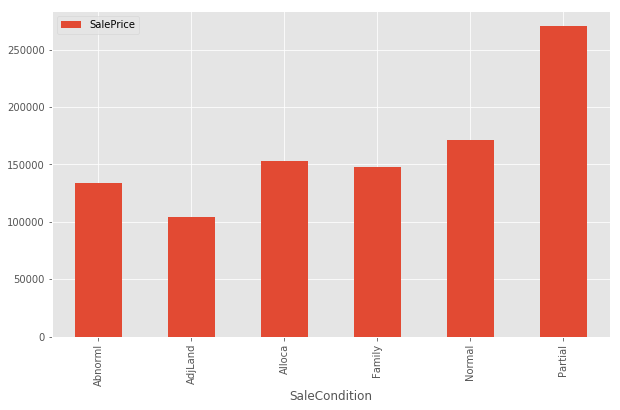

In [1816]:
saleCondition=train.pivot_table(index='SaleCondition',values='SalePrice')
saleCondition.plot(kind='bar')

In [0]:
if 'enc_condition' in train:
  train=train.drop('enc_condition',axis=1)
  test=test.drop('enc_condition',axis=1)
def encode(x):
  return 1 if x=='Partial' else 0
train['enc_condition']=train.SaleCondition.apply(encode)
test['enc_condition']=test.SaleCondition.apply(encode)
train=train.drop('SaleCondition',axis=1)
test=test.drop('SaleCondition',axis=1)

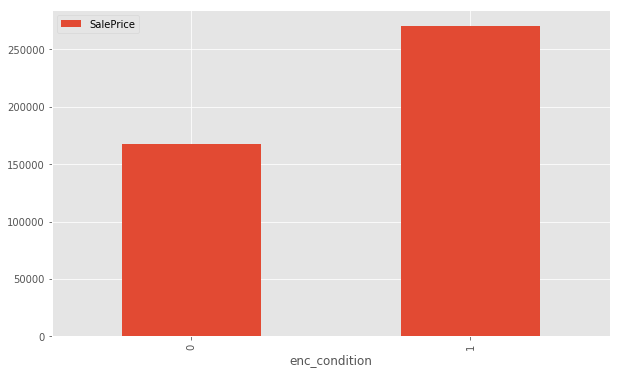

In [1818]:
saleCondition=train.pivot_table(index='enc_condition',values='SalePrice')
saleCondition.plot(kind='bar')

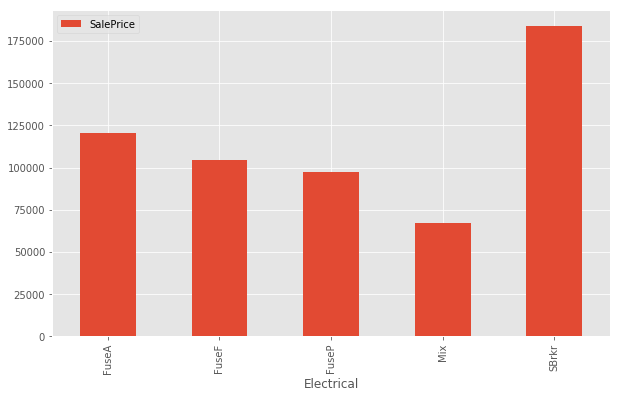

In [1819]:
categoricals=train.select_dtypes(exclude=np.number)
electrical=train.pivot_table(index='Electrical',values='SalePrice')
electrical.plot(kind='bar')

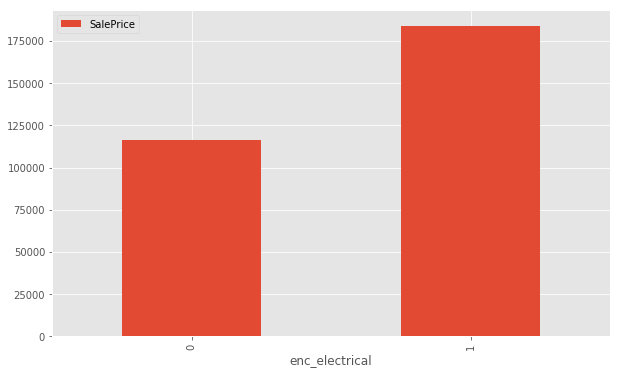

In [1820]:
if 'enc_electrical' in train:
  train=train.drop('enc_electrical',axis=1)
  test=test.drop('enc_electrical',axis=1)
def ele_encode(x):
  return 1 if x=='SBrkr' else 0
train['enc_electrical']=train.Electrical.apply(ele_encode)
test['enc_electrical']=test.Electrical.apply(ele_encode)
train=train.drop('Electrical',axis=1)
test=test.drop('Electrical',axis=1)
electrical=train.pivot_table(index='enc_electrical',values='SalePrice')
electrical.plot(kind='bar')

In [0]:
if 'enc_centralAir' in train:
  train=train.drop('enc_centralAir',axis=1)
  test=test.drop('enc_centralAir',axis=1)

In [0]:
train['enc_centralAir']=pd.get_dummies(train['CentralAir'],drop_first=True)
test['enc_centralAir']=pd.get_dummies(test['CentralAir'],drop_first=True)
train=train.drop('CentralAir',axis=1)
test=test.drop('CentralAir',axis=1)

In [0]:
train=train.interpolate('pad').dropna()
test=test.interpolate('pad').dropna()
saleType_mapping={"COD":0,"CWD":1,"Con":1,"ConLD":0,"ConLI":1,"ConLw":0,"New":1,"Oth":0,"WD":1}
train['SaleType']=train['SaleType'].map(saleType_mapping)
test['SaleType']=test['SaleType'].map(saleType_mapping)


In [0]:
for datatype in train.columns:
  if train[datatype].dtype=='object':
    train[datatype]=train[datatype].astype('category')
    train[datatype]=train[datatype].cat.codes
for datatype in test.columns:
  if test[datatype].dtype=='object':
    test[datatype]=test[datatype].astype('category')
    test[datatype]=test[datatype].cat.codes

In [0]:
# for cols in train.columns:
#   plt.scatter(train[str(cols)],np.log(train['SalePrice']))
#   plt.xlabel(str(cols))
#   plt.ylabel('SalesPrice')
#   plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


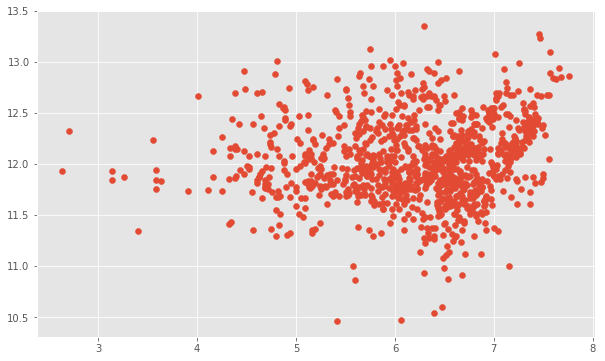

In [1826]:
plt.scatter(np.log(train['BsmtUnfSF']),np.log(train['SalePrice']))

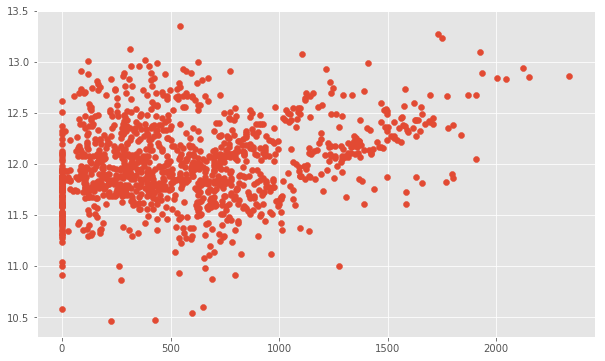

In [1827]:
plt.scatter(train['BsmtUnfSF'],np.log(train['SalePrice']))

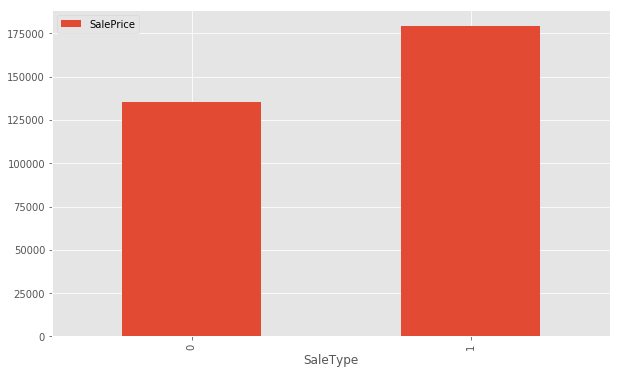

In [1828]:
houseStyle=train.pivot_table(index='SaleType',values='SalePrice')
houseStyle.plot(kind='bar')

In [1829]:
train.isnull().sum().sort_values(ascending=False)[:20]

enc_centralAir    0
HeatingQC         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
RoofStyle         0
dtype: int64

In [1830]:
categoricals=train.select_dtypes(exclude=np.number)
categoricals.head()

""
0
1
2
3
4


MODELLING

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
# y=np.log(train.SalePrice)
# y=y.astype(int)
y=train.SalePrice
X=train.drop(['SalePrice','Id','MiscVal','PoolArea','3SsnPorch','GarageYrBlt'],axis=1)
test_set=test.drop(['Id','MiscVal','PoolArea','3SsnPorch','GarageYrBlt'],axis=1)

**splitting training set using train_test_split from sklearn**

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=23,random_state=42)

In [0]:
gaussian_clf=GaussianNB()
gaussian_clf.fit(X_train,y_train)
prediction=gaussian_clf.predict(X_test)

In [1886]:
accuracy=accuracy_score(y_test,prediction)
print(accuracy)

0.0


In [0]:
test_set.to_csv('test1.csv',index=False)

In [0]:
test_mock=pd.read_csv('test1.csv')

In [0]:
predictions_test=gaussian_clf.predict(test_mock)

In [1871]:
predictions_test.min()

10

In [0]:
submission=pd.DataFrame({ "Id":  test['Id'],"SalePrice": predictions_test})
submission.to_csv('house_cost.csv',index=False)